In [1]:
import pandas as pd

In [2]:
vr = pd.read_csv('video_review.csv')

In [14]:
vr.head()

,Season_Year,GameKey,PlayID,GSISID,Player_Activity_Derived,Turnover_Related,Primary_Impact_Type,Primary_Partner_GSISID,Primary_Partner_Activity_Derived,Friendly_Fire
0,2016,5,3129,31057,Tackling,No,Helmet-to-body,32482,Tackled,No
1,2016,21,2587,29343,Blocked,No,Helmet-to-helmet,31059,Blocking,No
2,2016,29,538,31023,Tackling,No,Helmet-to-body,31941,Tackled,No
3,2016,45,1212,33121,Tackling,No,Helmet-to-body,28249,Tackled,No
4,2016,54,1045,32444,Blocked,No,Helmet-to-body,31756,Blocked,Yes


In [5]:
pprd = pd.read_csv('play_player_role_data.csv')

In [7]:
pprd.head()

,Season_Year,GameKey,PlayID,GSISID,Role
0,2017,414,188,33704,PDL2
1,2017,414,1107,33704,PDL2
2,2017,424,1113,33704,PDR3
3,2017,424,1454,33704,PLR2
4,2017,424,644,33704,PRG


In [23]:
ppd = pd.read_csv('player_punt_data.csv')

In [24]:
ppd.head()

,GSISID,Number,Position
0,32069,36,SS
1,30095,11,WR
2,31586,22,FS
3,29520,35,SS
4,30517,51,OLB


In [9]:
pi = pd.read_csv('play_information.csv')

In [10]:
pi.head()

,Season_Year,Season_Type,GameKey,Game_Date,Week,PlayID,Game_Clock,YardLine,Quarter,Play_Type,Poss_Team,Home_Team_Visit_Team,Score_Home_Visiting,PlayDescription
0,2016,Pre,2,08/13/2016,2,191,12:30,LA 47,1,Punt,LA,LA-DAL,0 - 7,"(12:30) J.Hekker punts 52 yards to DAL 1, Cent..."
1,2016,Pre,2,08/13/2016,2,1132,12:08,LA 29,2,Punt,LA,LA-DAL,7 - 21,"(12:08) J.Hekker punts 51 yards to DAL 20, Cen..."
2,2016,Pre,2,08/13/2016,2,1227,10:01,DAL 18,2,Punt,DAL,LA-DAL,7 - 21,"(10:01) C.Jones punts 40 yards to LA 42, Cente..."
3,2016,Pre,2,08/13/2016,2,1864,00:21,DAL 46,2,Punt,LA,LA-DAL,7 - 24,"(:21) J.Hekker punts 31 yards to DAL 15, Cente..."
4,2016,Pre,2,08/13/2016,2,2247,10:26,DAL 15,3,Punt,DAL,LA-DAL,14 - 24,"(10:26) M.Wile punts 40 yards to LA 45, Center..."


In [17]:
gd = pd.read_csv('game_data.csv')

In [18]:
gd.head()

,GameKey,Season_Year,Season_Type,Week,Game_Date,Game_Day,Game_Site,Start_Time,Home_Team,HomeTeamCode,Visit_Team,VisitTeamCode,Stadium,StadiumType,Turf,GameWeather,Temperature,OutdoorWeather
0,1,2016,Pre,1,2016-08-07 00:00:00.000,Sunday,Indianapolis,20:00,Indianapolis Colts,IND,Green Bay Packers,GB,Tom Benson Hall of Fame Stadium,Outdoor,Turf,NaN,NaN,NaN
1,2,2016,Pre,2,2016-08-13 00:00:00.000,Saturday,Los Angeles,17:00,Los Angeles Rams,LA,Dallas Cowboys,DAL,Los Angeles Memorial Coliseum,Outdoor,Grass,Sunny,79.0,Sunny
2,3,2016,Pre,2,2016-08-11 00:00:00.000,Thursday,Baltimore,19:30,Baltimore Ravens,BLT,Carolina Panthers,CAR,M&T Bank Stadium,Outdoor,Natural Grass,Party Cloudy,94.0,Partly Cloudy
3,4,2016,Pre,2,2016-08-12 00:00:00.000,Friday,Green Bay,19:00,Green Bay Packers,GB,Cleveland Browns,CLV,Lambeau Field,Outdoor,DD GrassMaster,NaN,73.0,NaN
4,5,2016,Pre,2,2016-08-11 00:00:00.000,Thursday,Chicago,19:00,Chicago Bears,CHI,Denver Broncos,DEN,Soldier Field,Outdoor,Grass,"Partly Cloudy, Chance of Rain 80%",88.0,NaN


In [20]:
len(gd['GameKey'].unique())

666

### Merge df's to get player role in punt play and normal position

In [21]:
df1 = pd.merge(vr, pprd.drop(columns='Season_Year'), how='left', on=['GameKey', 'PlayID', 'GSISID'], copy=False)

In [25]:
df1 = pd.merge(df1, ppd.drop(columns='Number'), how='left', on='GSISID', copy=False)

In [45]:
pi.head()

,Season_Year,Season_Type,GameKey,Game_Date,Week,PlayID,Game_Clock,YardLine,Quarter,Play_Type,Poss_Team,Home_Team_Visit_Team,Score_Home_Visiting,PlayDescription
0,2016,Pre,2,08/13/2016,2,191,12:30,LA 47,1,Punt,LA,LA-DAL,0 - 7,"(12:30) J.Hekker punts 52 yards to DAL 1, Cent..."
1,2016,Pre,2,08/13/2016,2,1132,12:08,LA 29,2,Punt,LA,LA-DAL,7 - 21,"(12:08) J.Hekker punts 51 yards to DAL 20, Cen..."
2,2016,Pre,2,08/13/2016,2,1227,10:01,DAL 18,2,Punt,DAL,LA-DAL,7 - 21,"(10:01) C.Jones punts 40 yards to LA 42, Cente..."
3,2016,Pre,2,08/13/2016,2,1864,00:21,DAL 46,2,Punt,LA,LA-DAL,7 - 24,"(:21) J.Hekker punts 31 yards to DAL 15, Cente..."
4,2016,Pre,2,08/13/2016,2,2247,10:26,DAL 15,3,Punt,DAL,LA-DAL,14 - 24,"(10:26) M.Wile punts 40 yards to LA 45, Center..."


In [46]:
pi.columns

Index(['Season_Year', 'Season_Type', 'GameKey', 'Game_Date', 'Week', 'PlayID',
       'Game_Clock', 'YardLine', 'Quarter', 'Play_Type', 'Poss_Team',
       'Home_Team_Visit_Team', 'Score_Home_Visiting', 'PlayDescription'],
      dtype='object')

In [47]:
pi_cols_to_drop = ['Season_Year', 'Season_Type', 'Game_Date', 'Week',
       'Quarter', 'Play_Type', 'Poss_Team',
       'Home_Team_Visit_Team', 'PlayDescription']

In [48]:
df1 = pd.merge(df1, pi.drop(columns=pi_cols_to_drop), how='left', on=['GameKey', 'PlayID'], copy=False)

In [49]:
df1.head()

,Season_Year,GameKey,PlayID,GSISID,Player_Activity_Derived,Turnover_Related,Primary_Impact_Type,Primary_Partner_GSISID,Primary_Partner_Activity_Derived,Friendly_Fire,Role,Position,Game_Clock,YardLine,Score_Home_Visiting
0,2016,5,3129,31057,Tackling,No,Helmet-to-body,32482,Tackled,No,PLW,RB,03:44,CHI 31,0 - 22
1,2016,5,3129,31057,Tackling,No,Helmet-to-body,32482,Tackled,No,PLW,RB,03:44,CHI 31,0 - 22
2,2016,21,2587,29343,Blocked,No,Helmet-to-helmet,31059,Blocking,No,GL,WR,05:52,TEN 45,10 - 13
3,2016,29,538,31023,Tackling,No,Helmet-to-body,31941,Tackled,No,GR,WR,04:46,NYJ 22,0 - 0
4,2016,45,1212,33121,Tackling,No,Helmet-to-body,28249,Tackled,No,PRT,ILB,08:29,NYG 46,0 - 0


In [27]:
df1['Role'].value_counts()

PLW     9
PRG     6
PLG     6
PLT     5
PR      5
GL      5
PLS     4
PRW     3
PDL2    3
PLL     2
PPR     2
PRT     2
VR      2
GR      1
P       1
PFB     1
PDR1    1
Name: Role, dtype: int64

### pull out data for first injury in video_review table

In [15]:
vr.loc[0]

Season_Year                                   2016
GameKey                                          5
PlayID                                        3129
GSISID                                       31057
Player_Activity_Derived                   Tackling
Turnover_Related                                No
Primary_Impact_Type                 Helmet-to-body
Primary_Partner_GSISID                       32482
Primary_Partner_Activity_Derived           Tackled
Friendly_Fire                                   No
Name: 0, dtype: object

In [72]:
ngs_16_pre = pd.read_csv('NGS-2016-pre.csv', parse_dates=['Time'])

In [73]:
ngs_16_pre.head()

,Season_Year,GameKey,PlayID,GSISID,Time,x,y,dis,o,dir,Event
0,2016,3,3949,33078.0,2016-08-12 02:27:11.100,58.320000,12.90,0.00,347.989990,64.320000,NaN
1,2016,3,3949,24417.0,2016-08-12 02:27:11.100,56.740002,13.85,0.02,18.180000,359.750000,NaN
2,2016,3,3949,32570.0,2016-08-12 02:27:11.100,50.779999,0.34,0.09,286.130005,185.149994,NaN
3,2016,3,3949,27831.0,2016-08-12 02:27:11.200,59.340000,12.33,0.05,325.130005,294.489990,NaN
4,2016,3,3949,32575.0,2016-08-12 02:27:11.200,52.950001,-0.37,0.03,322.970001,145.889999,NaN


In [75]:
ngs_16_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6824901 entries, 0 to 6824900
Data columns (total 11 columns):
Season_Year    int64
GameKey        int64
PlayID         int64
GSISID         float64
Time           datetime64[ns]
x              float64
y              float64
dis            float64
o              float64
dir            float64
Event          object
dtypes: datetime64[ns](1), float64(6), int64(3), object(1)
memory usage: 572.8+ MB


In [33]:
def get_play_info(gk, pid):
    return pi[(pi['GameKey'] == gk) & (pi['PlayID'] == pid)]

In [97]:
def get_play_ngs(gk, pid, df):
    new_df = df[(df['GameKey'] == gk) & (df['PlayID'] == pid)]
    new_df = new_df.drop(columns=['GameKey', 'PlayID', 'Season_Year'])
    return new_df

In [31]:
pi1 = get_play_info(5, 3129)

In [32]:
pi1

,Season_Year,Season_Type,GameKey,Game_Date,Week,PlayID,Game_Clock,YardLine,Quarter,Play_Type,Poss_Team,Home_Team_Visit_Team,Score_Home_Visiting,PlayDescription
35,2016,Pre,5,08/11/2016,2,3129,03:44,CHI 31,3,Punt,CHI,CHI-DEN,0 - 22,(3:44) (Punt formation) P.O'Donnell punts 58 y...


In [98]:
ngs1 = get_play_ngs(5, 3129, ngs_16_pre)

In [99]:
ngs1.head()

,GSISID,Time,x,y,dis,o,dir,Event
200101,31130.0,2016-08-12 02:07:26.300,80.540001,25.969999,0.06,137.669998,168.889999,NaN
200102,28284.0,2016-08-12 02:07:26.300,79.599998,27.150000,0.05,191.940002,291.660004,NaN
200103,31915.0,2016-08-12 02:07:26.300,80.750000,24.500000,0.01,160.529999,345.260010,NaN
200104,31209.0,2016-08-12 02:07:26.300,79.540001,7.180000,0.02,169.179993,272.519989,NaN
200105,28041.0,2016-08-12 02:07:26.300,80.269997,28.299999,0.02,137.050003,46.270000,NaN


In [41]:
len(ngs1)

5962

Most 'Events' are 'nan'

What is the order of 'Events'?

In [51]:
events = []
for x in ngs1['Event']:
#     x = ngs1.loc[i,'Event']
    if not x in events:
        events.append(x)

In [52]:
events

[nan,
 'punt_play',
 'line_set',
 'ball_snap',
 'punt_received',
 'tackle',
 'penalty_flag',
 'play_submit',
 'punt']

In [85]:
ngs1['dt'] = ngs1.groupby('GSISID')['Time'].diff()

/Users/kendra/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [88]:
ngs1.sample(10)

,Season_Year,GameKey,PlayID,GSISID,Time,x,y,dis,o,dir,Event,dt
205471,2016,5,3129,32477.0,2016-08-12 02:07:51.100,31.850000,8.910000,0.15,182.160004,351.920013,NaN,00:00:08.700000
204476,2016,5,3129,32958.0,2016-08-12 02:07:37.400,77.949997,7.490000,0.06,16.650000,212.380005,NaN,00:00:00.500000
205694,2016,5,3129,32482.0,2016-08-12 02:07:43.300,20.889999,18.510000,0.22,353.760010,290.010010,NaN,-1 days +23:59:54.300000
202579,2016,5,3129,32958.0,2016-08-12 02:07:25.400,74.830002,20.440001,0.29,87.360001,176.160004,NaN,00:00:00.100000
204290,2016,5,3129,30705.0,2016-08-12 02:07:39.400,79.720001,25.420000,0.28,308.399994,266.250000,NaN,00:00:00.100000
200860,2016,5,3129,32790.0,2016-08-12 02:07:36.800,83.419998,25.790001,0.01,167.449997,353.600006,NaN,00:00:00.100000
204763,2016,5,3129,32460.0,2016-08-12 02:07:45.500,59.490002,14.500000,0.70,147.220001,244.440002,NaN,00:00:00.100000
205640,2016,5,3129,32136.0,2016-08-12 02:07:45.300,26.459999,19.219999,0.25,187.699997,225.169998,NaN,00:00:00.100000
201540,2016,5,3129,31079.0,2016-08-12 02:07:41.700,83.949997,31.150000,0.40,176.020004,266.459991,NaN,00:00:00.100000
200890,2016,5,3129,31057.0,2016-08-12 02:07:37.200,82.790001,23.250000,0.09,206.639999,115.870003,NaN,00:00:00.100000


In [91]:
import matplotlib.pyplot as plt

/Users/kendra/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:708: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  a, weights = _ravel_and_check_weights(a, weights)


TypeError: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

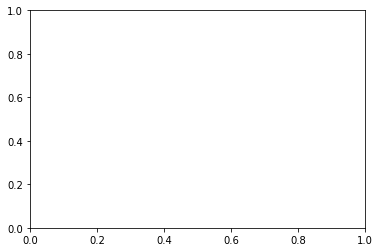

In [94]:
plt.hist(ngs1['dt'].notnull())

In [84]:
ngs1_diff.head()

200101   NaT
200102   NaT
200103   NaT
200104   NaT
200105   NaT
Name: Time, dtype: timedelta64[ns]

In [67]:
ngs1_pt = pd.pivot_table(ngs1, index='Time', values=['dis'], columns=['GSISID'])

In [68]:
ngs1_pt.head()

dis                                          \
GSISID                  26852.0 27718.0 28041.0 28284.0 30705.0 31057.0   
Time                                                                      
2016-08-12 02:07:25.100    0.07    0.05    0.04    0.03    0.01    0.06   
2016-08-12 02:07:25.200    0.07    0.05    0.02    0.05    0.02    0.08   
2016-08-12 02:07:25.300    0.06    0.05    0.01    0.04    0.04    0.08   
2016-08-12 02:07:25.400    0.06    0.05    0.01    0.04    0.04    0.06   
2016-08-12 02:07:25.500    0.05    0.05    0.01    0.01    0.04    0.05   

                                                          ...            \
GSISID                  31079.0 31130.0 31209.0 31697.0   ...   32460.0   
Time                                                      ...             
2016-08-12 02:07:25.100    0.12    0.04    0.04    0.05   ...      0.02   
2016-08-12 02:07:25.200    0.11    0.01    0.04    0.07   ...      0.02   
2016-08-12 02:07:25.300    0.11    0.03    0.06    0.07   ...      0.02   
2016-08-12 02:07:25.400    0.11    0.04    0.08    0.06   ...      0.01   
2016-08-12 02:07:25.500    0.10    0.04    0.08    0.08   ...      0.01   

                                                                         \
GSISID                  32471.0 32477.0 32482.0 32489.0 32519.0 32776.0   
Time                                                                      
2016-08-12 02:07:25.100    0.03    0.09    0.01    0.10    0.02    0.04   
2016-08-12 02:07:25.200    0.08    0.09    0.01    0.08    0.02    0.03   
2016-08-12 02:07:25.300    0.06    0.09    0.01    0.07    0.02    0.02   
2016-08-12 02:07:25.400    0.05    0.09    0.01    0.07    0.01    0.02   
2016-08-12 02:07:25.500    0.02    0.07    0.01    0.07    0.00    0.01   

                                                 
GSISID                  32790.0 32958.0 33064.0  
Time                                             
2016-08-12 02:07:25.100    0.04    0.30     0.0  
2016-08-12 02:07:25.200    0.04    0.31     0.0  
2016-08-12 02:07:25.300    0.05    0.31     0.0  
2016-08-12 02:07:25.400    0.05    0.29     0.0  
2016-08-12 02:07:25.500    0.03    0.30     0.0  

[5 rows x 23 columns]

In [81]:
ngs1['dt'] = ngs1['Time'].diff().astype('timedelta64[s]')

/Users/kendra/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [82]:
ngs1.head()

,Season_Year,GameKey,PlayID,GSISID,Time,x,y,dis,o,dir,Event,dt
200101,2016,5,3129,31130.0,2016-08-12 02:07:26.300,80.540001,25.969999,0.06,137.669998,168.889999,NaN,NaN
200102,2016,5,3129,28284.0,2016-08-12 02:07:26.300,79.599998,27.150000,0.05,191.940002,291.660004,NaN,0.0
200103,2016,5,3129,31915.0,2016-08-12 02:07:26.300,80.750000,24.500000,0.01,160.529999,345.260010,NaN,0.0
200104,2016,5,3129,31209.0,2016-08-12 02:07:26.300,79.540001,7.180000,0.02,169.179993,272.519989,NaN,0.0
200105,2016,5,3129,28041.0,2016-08-12 02:07:26.300,80.269997,28.299999,0.02,137.050003,46.270000,NaN,0.0
